In [3]:
import pandas as pd

data = pd.read_csv('comprar_arrendar.csv')
df = pd.DataFrame(data)
print (df)

     ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0        6000            1000           0           600    50000    400000   
1        6745             944         123           429    43240    636897   
2        6455            1033          98           795    57463    321779   
3        7098            1278          15           254    54506    660933   
4        6167             863         223           520    41512    348932   
..        ...             ...         ...           ...      ...       ...   
197      3831             690         352           488    10723    363120   
198      3961            1030         270           475    21880    280421   
199      3184             955         276           684    35565    388025   
200      3334             867         369           652    19985    376892   
201      3988            1157         105           382    11980    257580   

     estado_civil  hijos  trabajo  comprar  
0               0 

In [4]:
# Valores nulos
for feature in df.columns:
    print('Total de valores nulos de', feature, '=', df[feature].isna().sum())

Total de valores nulos de ingresos = 0
Total de valores nulos de gastos_comunes = 0
Total de valores nulos de pago_coche = 0
Total de valores nulos de gastos_otros = 0
Total de valores nulos de ahorros = 0
Total de valores nulos de vivienda = 0
Total de valores nulos de estado_civil = 0
Total de valores nulos de hijos = 0
Total de valores nulos de trabajo = 0
Total de valores nulos de comprar = 0


In [5]:
# Tipos de datos de las columnas
df.dtypes

ingresos          int64
gastos_comunes    int64
pago_coche        int64
gastos_otros      int64
ahorros           int64
vivienda          int64
estado_civil      int64
hijos             int64
trabajo           int64
comprar           int64
dtype: object

In [6]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [9]:
print(df.groupby('comprar').size())

comprar
0    135
1     67
dtype: int64


Matplotlib is building the font cache; this may take a moment.


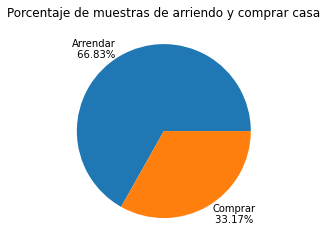

In [10]:
import matplotlib.pyplot as plt
# Gráfico de tortas del porcentaje de muestras benignas y mañignas
# Contando las benignas
clases = np.array([df[df.comprar == 0].shape[0], df[df.comprar == 1].shape[0]])

# Creando las leyendas del grafico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Arrendar\n ' + labels[0]
labels[1] = 'Comprar\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de muestras de arriendo y comprar casa')
plt.show()

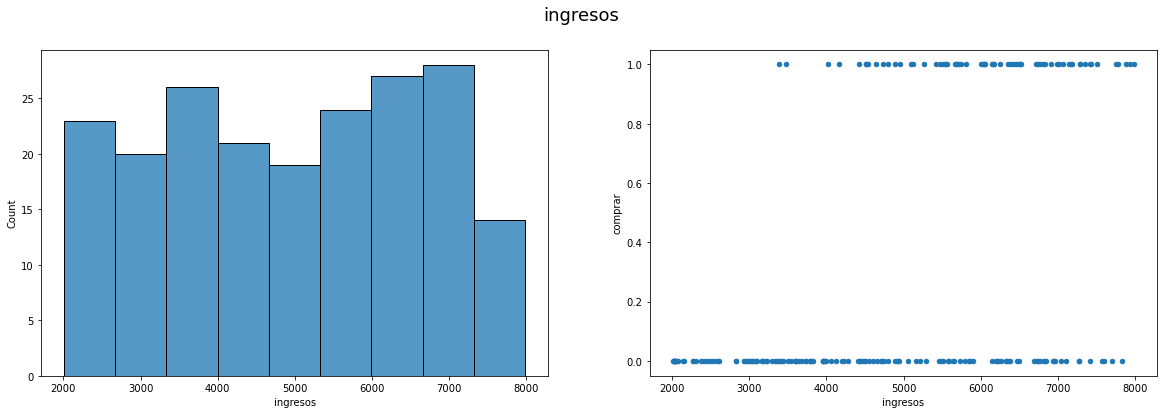

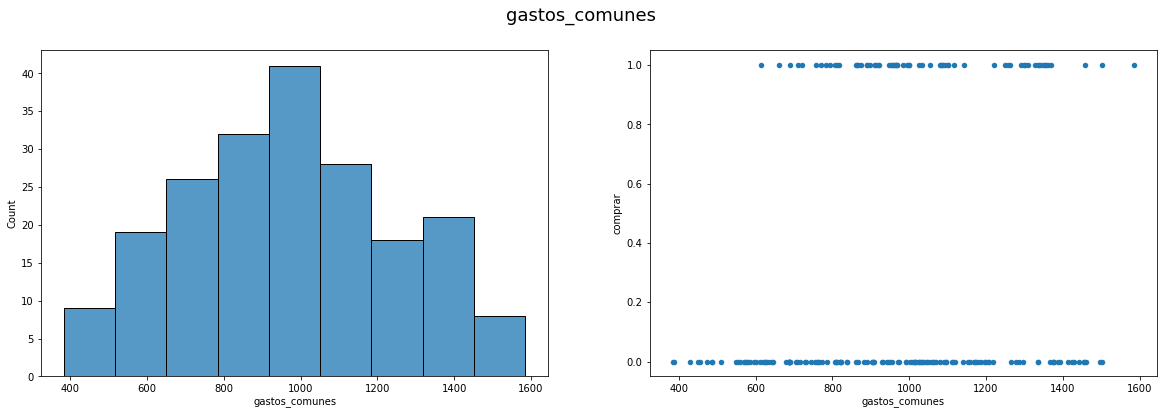

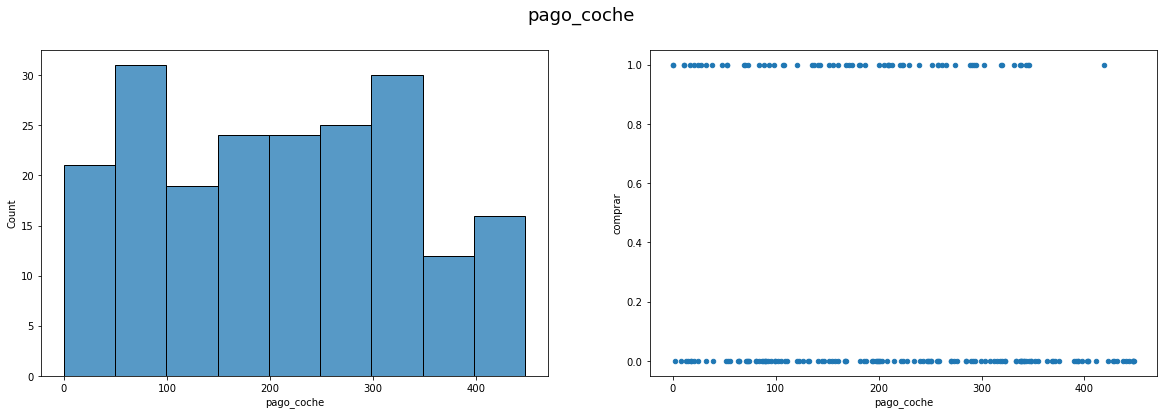

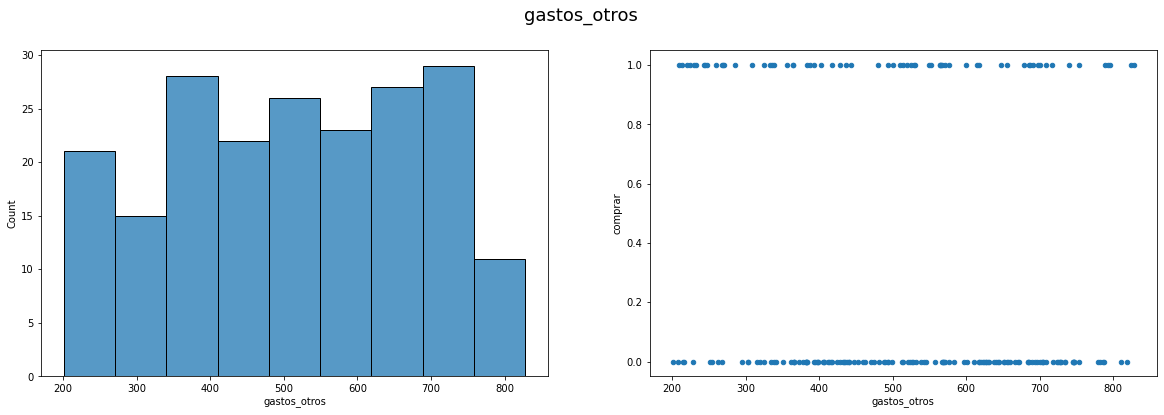

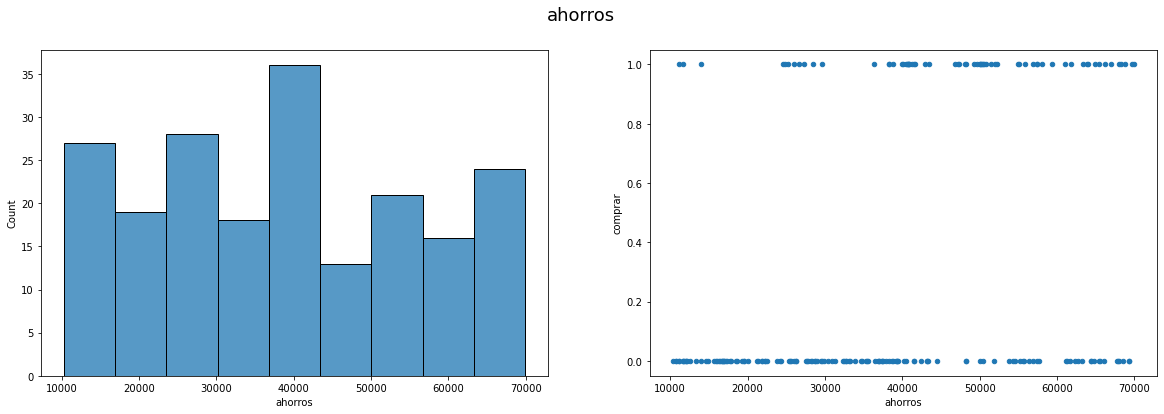

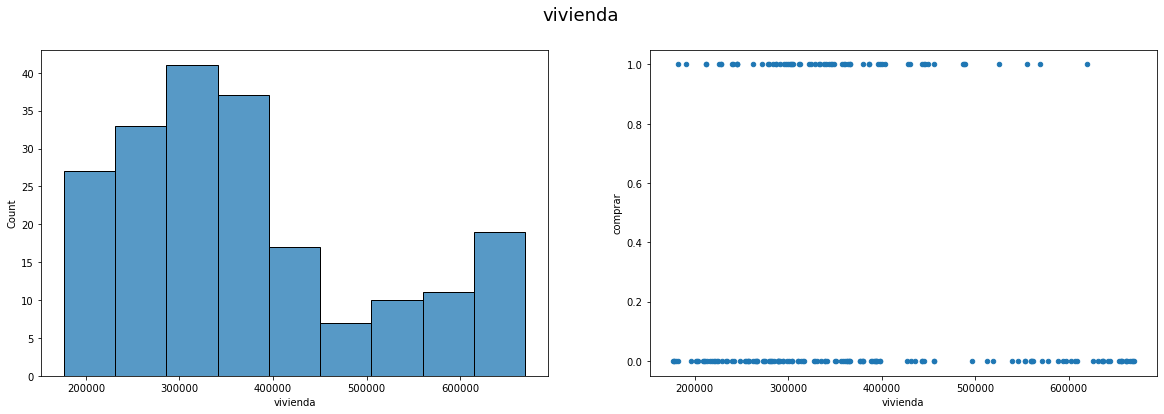

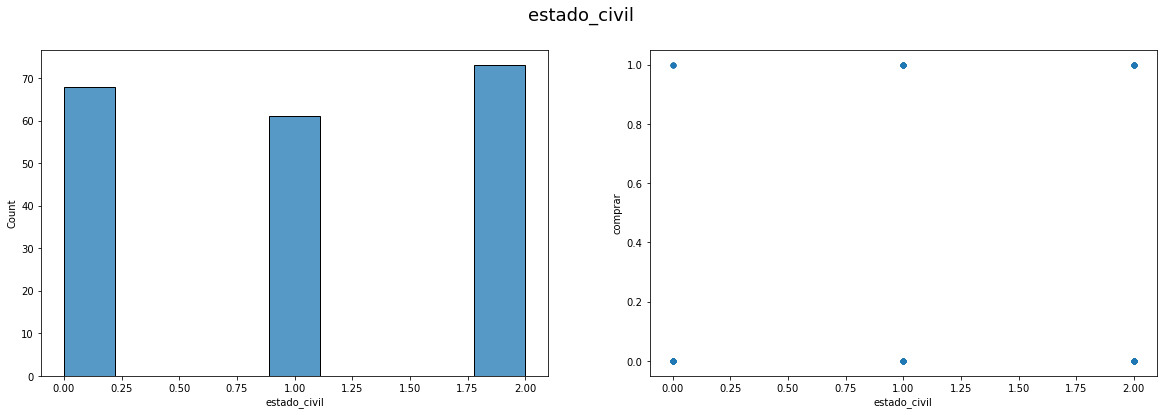

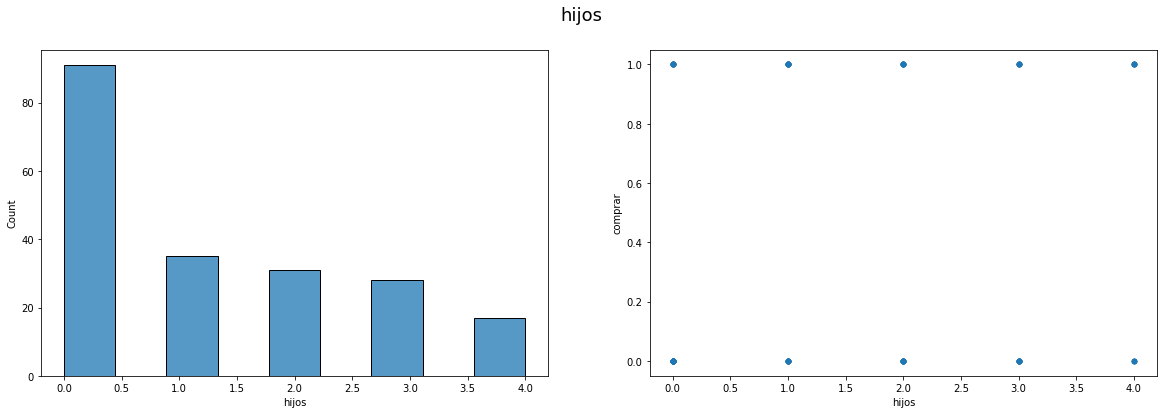

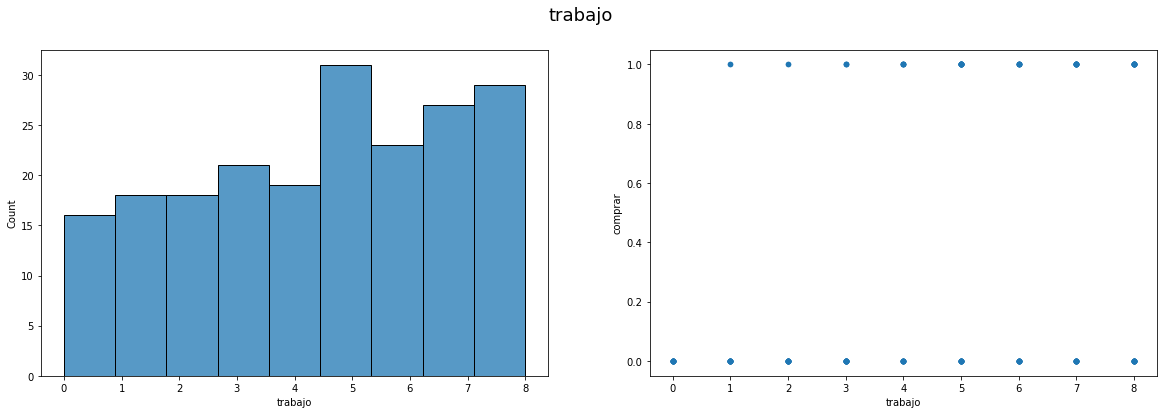

In [11]:
import seaborn as sns
columnas = np.array(df.columns)

for col in columnas[:-1]:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.histplot(df[col], ax=ax[0], kde=False)
    df[[col]+['comprar']].plot.scatter(x=col, y='comprar', ax=ax[1])
    plt.show()

In [12]:
# Selecciona las variables
X = df.drop(["comprar"],axis=1)

# Rescata la etiqueta
y = df.comprar

In [13]:
from sklearn.model_selection import train_test_split

# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

# Define el algoritmo a utilizar Naive Bayes
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo.predict(X_test)


In [14]:
# Evaluación del modelo
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# Se calcula la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:', precision)

Matriz de Confusión:
[[23  5]
 [ 1 12]]
Precisión del modelo: 0.7058823529411765


In [15]:
## INTERPRETACIÓN

Existen 35 datos predichos de forma correcta
Existen 6 datos incorrectos.

## MATRIZ DE CONFUSIÓN

Se define que la persona comprará una casa si está marcado como 1 y arrendará si está como 0

Verdaderos positivos: 23
Falso positivo: 5
Falso negativo: 1
Verdadero negativo: 12
    



SyntaxError: invalid syntax (<ipython-input-15-ef78958bdf2b>, line 3)